In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import sys

sys.path.append("../../examples")

from sedov import sedov_rduP

In [2]:
# sedov blast params
t = 1e-3
gamma = 1.4

# set up numerical solution
N = 200
p = 4

solver = EulerSolver(
    w0=partial(sedov, dims="x", mode="center", E0=1e-12, E1=3200000.0),
    bc=BoundaryCondition(x="free"),
    gamma=gamma,
    x=(-2, 2),
    conservative_ic=True,
    fv_ic=True,
    nx=N,
    px=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=p > 0,
    NAD=1e-5,
    slope_limiter="moncen",
    density_floor=True,
    pressure_floor=True,
    snapshots_as_fv_averages=False,
    cupy=False,
)

# run simulation
solver.rkorder(t)

/usr/local/Caskroom/miniconda/base/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Caskroom/miniconda/base/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
  0%|          | 0/0.001 [00:00]/Users/jonathan/Desktop/FVHOE/fvhoe/hydro.py:52: RuntimeWarning: invalid value encountered in sqrt
  out = np.sqrt(gamma * P / rho)
100%|██████████| 0.001/0.001 [00:07]                 


t=0.001, x=[-1.99, 1.99], y=0.5, z=0.5
t=0.001, x=[-1.99, 1.99], y=0.5, z=0.5
t=0.001, x=[-1.99, 1.99], y=0.5, z=0.5


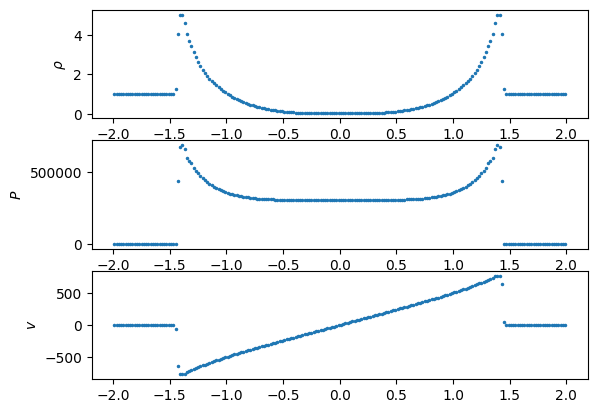

In [3]:
fig, axs = plt.subplots(3, 1)

marker_config = dict(linestyle="none", marker=".", markersize=3)

axs[0].set_ylabel(r"$\rho$")
solver.plot_1d_slice(axs[0], param="rho", y=0.5, z=0.5, **marker_config)

axs[1].set_ylabel(r"$P$")
solver.plot_1d_slice(axs[1], param="P", y=0.5, z=0.5, **marker_config)

axs[2].set_ylabel(r"$v$")
solver.plot_1d_slice(axs[2], param="vx", y=0.5, z=0.5, **marker_config)

fig.savefig("/Users/jonathan/Desktop/MUSCL_RK4.png")